In [260]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 200)

In [261]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [262]:
churnData.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [263]:
churnData['TotalCharges'] = churnData['TotalCharges'].str.replace(' ','')
churnData[["TotalCharges"]] = churnData[["TotalCharges"]].apply(pd.to_numeric)

In [264]:
churnData.isnull().values.any()

True

In [265]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [266]:
churnData['TotalCharges'].mean()

2283.3004408418697

In [267]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [268]:
churnData['TotalCharges']=churnData['TotalCharges'].fillna((churnData['TotalCharges'].mean()))


In [269]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [270]:
churnData["TotalCharges"].dtype

dtype('float64')

In [271]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


### Choosing our features

In [272]:
Cols_tokeep = churnData[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges','Churn']]
Cols_tokeep

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes
...,...,...,...,...,...
7038,24,0,84.80,1990.50,No
7039,72,0,103.20,7362.90,No
7040,11,0,29.60,346.45,No
7041,4,1,74.40,306.60,Yes


In [273]:
Cols_tokeep['Churn']=Cols_tokeep.apply(lambda x : 1 if x['Churn']=='Yes' else 0, axis=1)
Cols_tokeep

/var/folders/kd/_v4w82350msg_f4j5bjw0s000000gn/T/ipykernel_49958/1907374880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cols_tokeep['Churn']=Cols_tokeep.apply(lambda x : 1 if x['Churn']=='Yes' else 0, axis=1)


,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


#### Defining X, y

In [274]:
X = Cols_tokeep.drop(columns=["Churn"], axis = 1)
y = Cols_tokeep["Churn"]

#### Data Splitting

In [275]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

#### Scaling train set and test set 

In [276]:
y_train

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int64

In [255]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

trans = StandardScaler()
knn_model = KNeighborsClassifier(n_neighbors=7)

## Data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)
X_test_mod

array([[-1.28460467, -0.4377492 , -1.33162874, -1.00238817],
       [ 0.35323794, -0.4377492 , -1.31667194, -0.57263351],
       [ 0.80364466, -0.4377492 , -1.51277218, -0.55704266],
       ...,
       [-0.62946762, -0.4377492 , -1.49449165, -0.86751071],
       [ 1.49972776, -0.4377492 , -0.69513389,  0.29587649],
       [-1.28460467, -0.4377492 , -1.11392424, -0.99949115]])

In [256]:
knn_model.fit(X_train_mod, y_train)

y_pred_train_log = knn_model.predict(X_train_mod)
y_pred_test_log = knn_model.predict(X_test_mod)
y_pred_test_log

array([1, 0, 0, ..., 0, 0, 1])

In [257]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.824636,0.786373
1,Precision,0.721254,0.616883
2,Recall,0.553476,0.509383


Confusion matrix for the train set
[[3818  320]
 [ 668  828]]


/Users/divi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


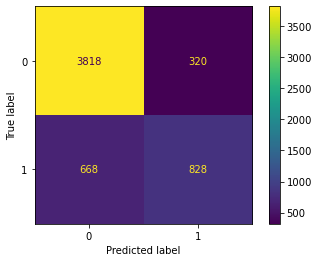



Confusion matrix for the test set
[[918 118]
 [183 190]]


/Users/divi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


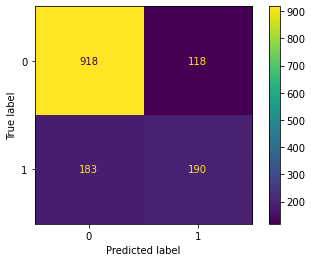

In [258]:
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(knn_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(knn_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [237]:
full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)
    
    print(k, "Reacall: ", recall_score(y_test, y_pred_test_knn), "Accuracy: ", accuracy_score(y_test, y_pred_test_knn))


2 Reacall:  0.2949061662198391 Accuracy:  0.7735982966643009
3 Reacall:  0.4879356568364611 Accuracy:  0.7679205110007097
4 Reacall:  0.3699731903485255 Accuracy:  0.7863733144073811
5 Reacall:  0.47989276139410186 Accuracy:  0.7828246983676366
6 Reacall:  0.3941018766756032 Accuracy:  0.7920511000709723
7 Reacall:  0.4691689008042895 Accuracy:  0.7913413768630234
8 Reacall:  0.3941018766756032 Accuracy:  0.794889992902768
9 Reacall:  0.450402144772118 Accuracy:  0.7934705464868701
10 Reacall:  0.3967828418230563 Accuracy:  0.794180269694819
11 Reacall:  0.43967828418230565 Accuracy:  0.7984386089425124
12 Reacall:  0.3967828418230563 Accuracy:  0.794889992902768
13 Reacall:  0.4343163538873995 Accuracy:  0.7970191625266146
14 Reacall:  0.3726541554959786 Accuracy:  0.78708303761533
15 Reacall:  0.4128686327077748 Accuracy:  0.7913413768630234
16 Reacall:  0.3780160857908847 Accuracy:  0.794180269694819
17 Reacall:  0.4155495978552279 Accuracy:  0.7920511000709723
18 Reacall:  0.383378

### Round2-Fit a Decision Tree Classifier on the training data. Check the accuracy on the test data.

In [259]:
X_train.shape

(5634, 4)

In [278]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
# No scaling for decision tree classifier
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)



In [279]:
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.782570,0.792051
1,Precision,0.648738,0.663934
2,Recall,0.395053,0.434316


/Users/divi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/divi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


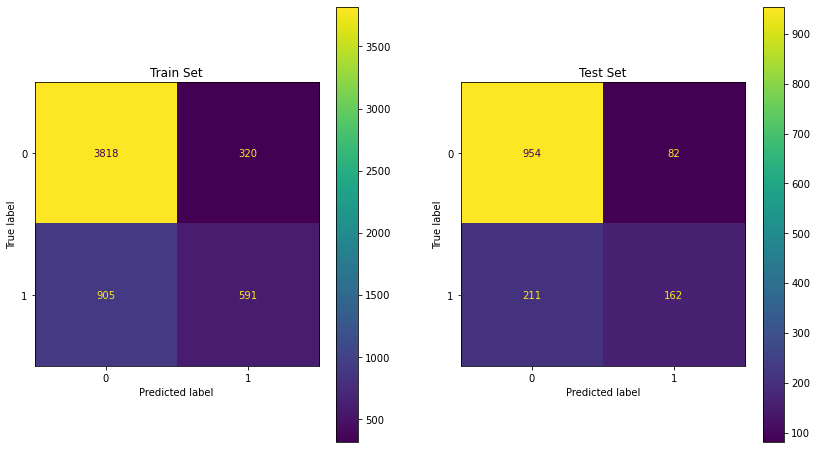

In [280]:
fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Feature importance

<BarContainer object of 4 artists>

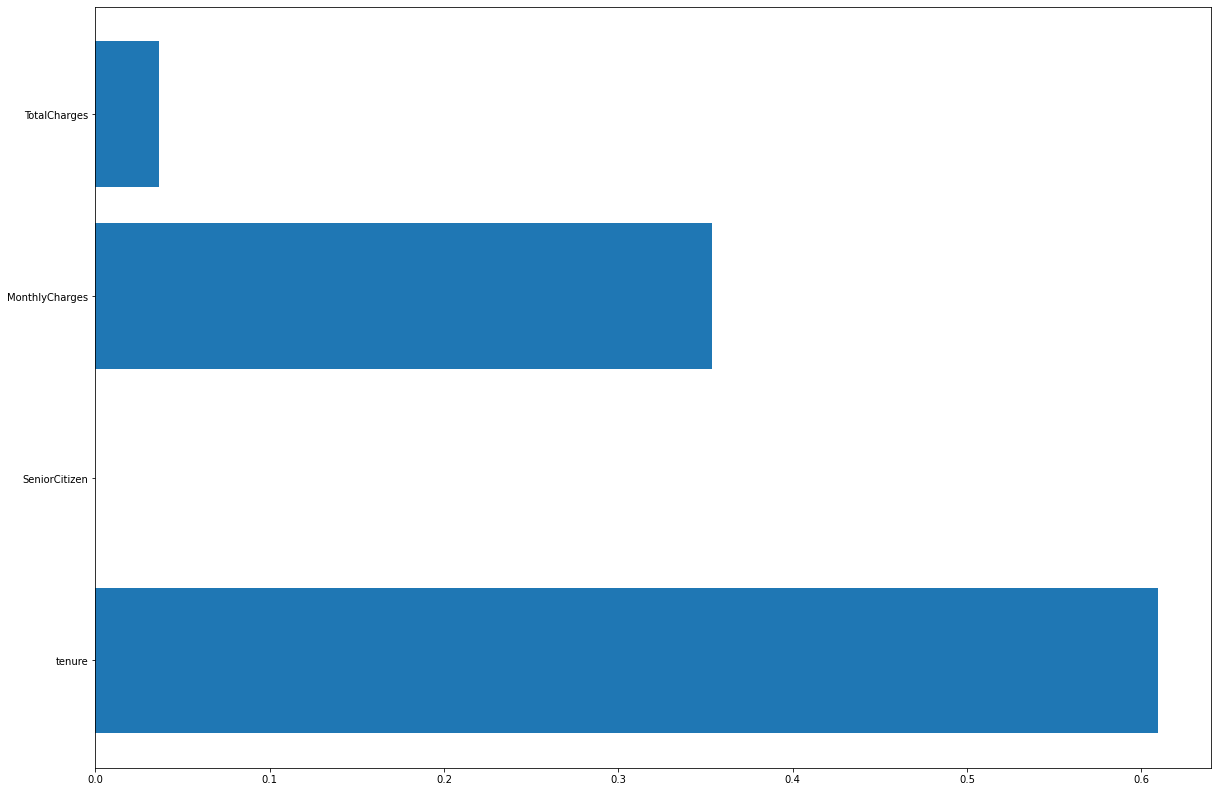

In [282]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

#### Decision tree plot

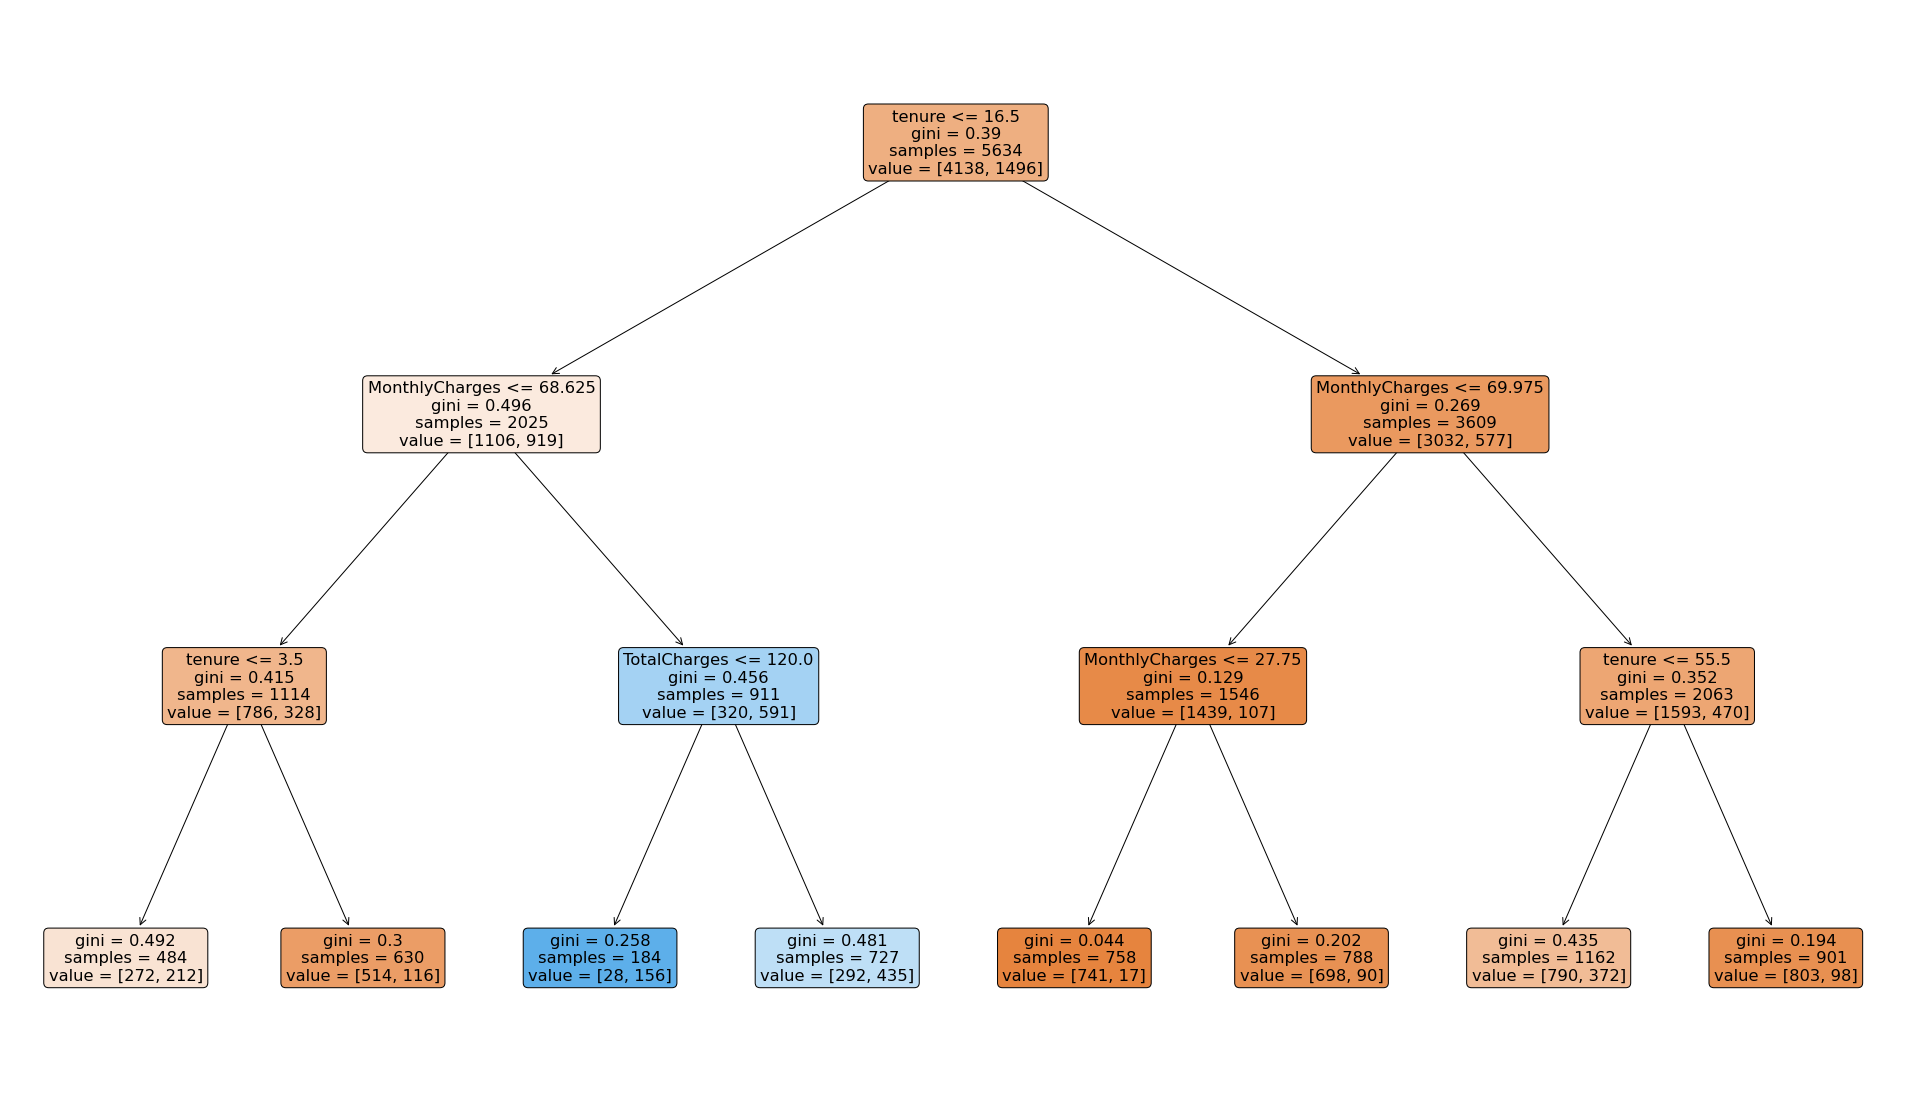

In [284]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

#### Checking decision tree including the entire dataframe

In [289]:
Df = churnData.copy()
Df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [287]:
Categorical = Df.select_dtypes(include=['object'])
Categorical

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,No
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,No
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,No
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,No
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,No
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month,No
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes


In [288]:
Dummy = pd.get_dummies(data = Categorical,drop_first=True)
Dummy

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [291]:
Num = Df.select_dtypes(np.number)
Num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [292]:
Whole_df = pd.concat([Dummy, Num], axis=1)
Whole_df

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,29.85,29.85
1,1,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,34,56.95,1889.50
2,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,2,53.85,108.15
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,...,1,0,1,1,0,0,0,24,84.80,1990.50
7039,0,1,1,1,0,0,0,1,0,1,...,1,0,1,1,0,0,0,72,103.20,7362.90
7040,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,11,29.60,346.45
7041,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,4,74.40,306.60


#### Defining X,y

In [294]:
X = Whole_df.drop(columns=["Churn_Yes"], axis = 1)
y = Whole_df["Churn_Yes"]

#### Data Splitting

In [295]:
#### from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

#### Applying Decision tree classifier

In [305]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
# No scaling for decision tree classifier
model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)



In [306]:
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.797125,0.800568
1,Precision,0.658580,0.663121
2,Recall,0.489973,0.501340


##### Feature importance

<BarContainer object of 22 artists>

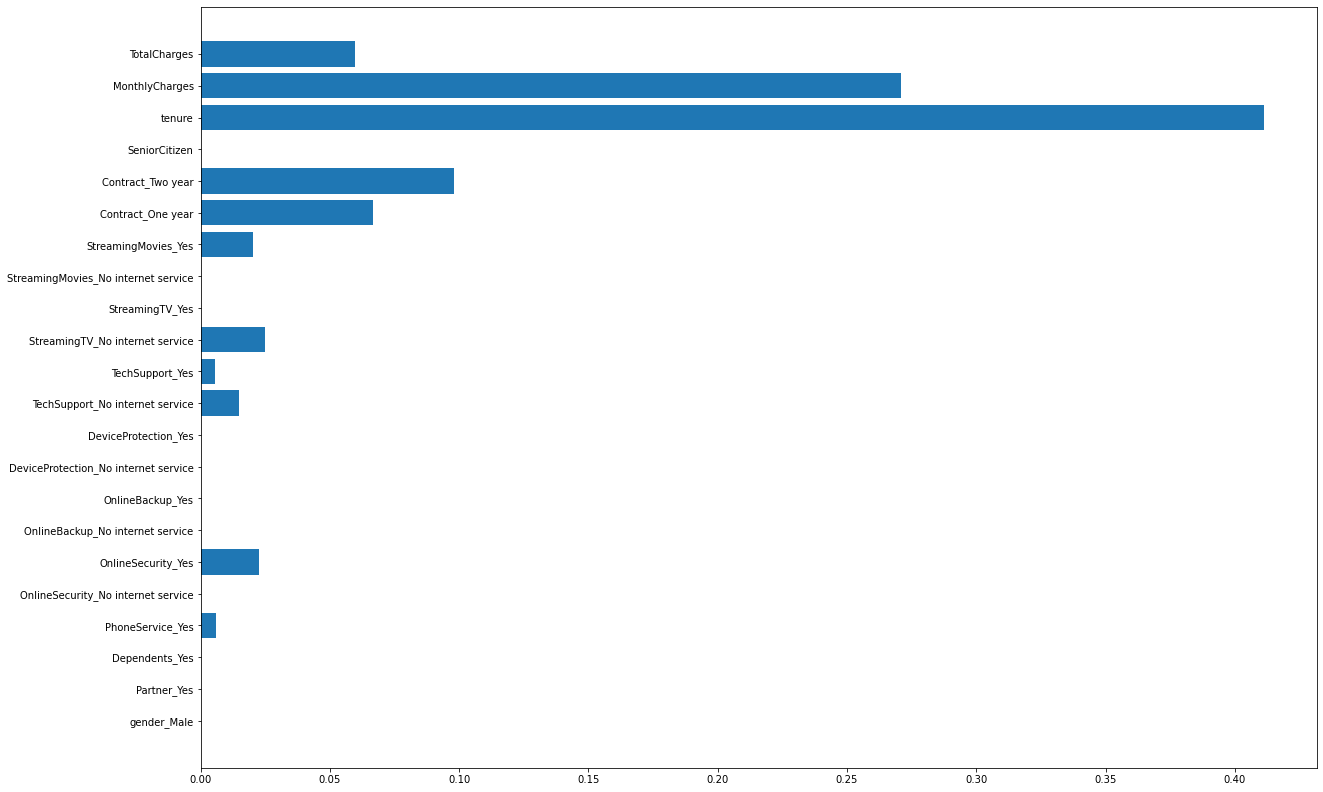

In [307]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

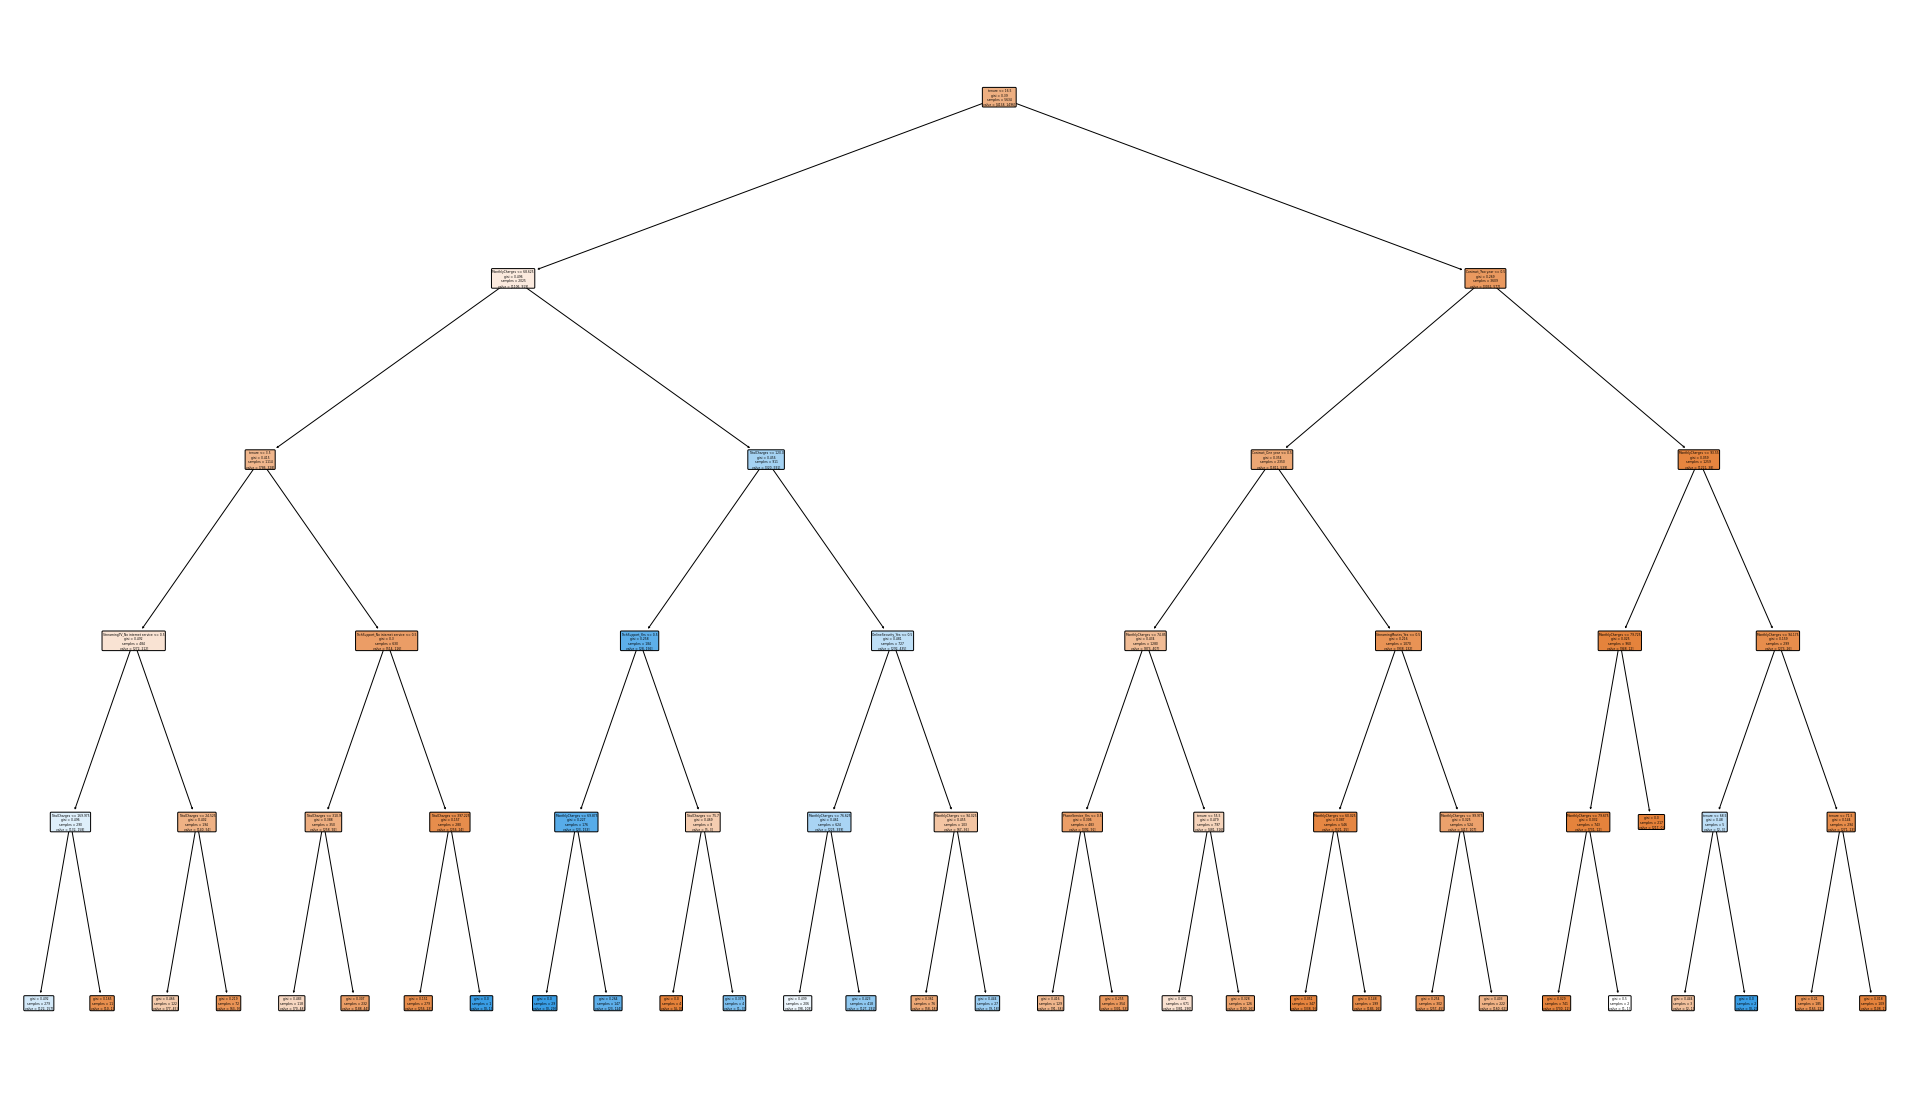

In [308]:
#from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 